# 1.Dataset Preparation

The data set comprising 6k records spread across 63 categories (approx. 100 items per category).To prepare the dataset, load the downloaded data into a pandas dataframe containing Four columns – ASIN, Brand Name, Category Name and Product Title.
ASIN: The primary key of each product
Brand Name, Product Title: Text features for model training
Category Name: The label information for model training

In [295]:
# load the dataset
import pandas as pd
df = pd.read_excel(io='data/Training_Data_Assessment.xlsx', sheet_name='training_data')

In [297]:
# quick view of data
print(df.head(5))

         ASIN             CategoryName BrandName  \
0  B014FCC4NO               Headphones  01 Audio   
1  B00RE20CVO                   Cables    1byone   
2  B00HEZV6AC  Security & Surveillance    1byone   
3  B00ZWOU5R2          Streaming Media    1byone   
4  B00RFLXE0A   Television Accessories    1byone   

                                               Title  
0  Bluetooth Headphones, Wireless Earbuds Earphon...  
1   1Byone Lightning to USB Cable 3.28ft (1M) for...  
2  1byone? 7 Inch Colorful LCD Screen Video Doorb...  
3  1byone 5GHz Wireless HDMI Streaming Media Play...  
4  1byone Shiny Antenna Super Thin Amplified HDTV...  


In [298]:
# digitalize the label for fitting to the model 
dic={}
count=0
for index, row in df.iterrows():
    categary_name=row['CategoryName']
    if categary_name not in dic:
        dic[categary_name]=count
        count+=1

In [115]:
for key, value in dic.items():
    print(key + "==>" + str(value))

Headphones==>0
Cables==>1
Security & Surveillance==>2
Streaming Media==>3
Television Accessories==>4
Monitor Risers==>5
Gaming Accessories==>6
Video Games==>7
Video Cameras==>8
3D Printers & Supplies==>9
Drones==>10
Mice==>11
Computer Accessories==>12
Keyboards==>13
Monitor Mounts==>14
Monitors==>15
Office Electronics==>16
Camera Accessories==>17
Range Extenders==>18
Ink & Toner==>19
Car & Vehicle Electronics==>20
Video Projectors==>21
Tablet Accessories==>22
Car Subwoofers & Amplifiers==>23
Tablets==>24
Laptop Accessories==>25
Tripods & Monopods==>26
Televisions==>27
Batteries==>28
Desktops==>29
Laptops==>30
Home Audio==>31
GPS & Navigation==>32
Radar Detectors==>33
Mobile Phone Accessories==>34
Headsets==>35
Binoculars & Scopes==>36
Modems==>37
Cases & Screen Protectors==>38
TV Mounts & Stands==>39
eBook Readers & Accessories==>40
Computer Data Storage==>41
Portable Audio & Speakers==>42
Power Management==>43
Computer Components==>44
Video Cards==>45
Printers & Scanners==>46
Memory C

In [299]:
# add digital label into dataframe 
label_col = []
text_preprocessed = []
for index, row in df.iterrows():
    categary_name=row['CategoryName']
    label_col.append(dic[categary_name])
df['label']=label_col

In [ ]:
# Visulization of new data label

In [136]:
df[:5]

,ASIN,CategoryName,BrandName,Title,label
0,B014FCC4NO,Headphones,01 Audio,"Bluetooth Headphones, Wireless Earbuds Earphon...",0
1,B00RE20CVO,Cables,1byone,1Byone Lightning to USB Cable 3.28ft (1M) for...,1
2,B00HEZV6AC,Security & Surveillance,1byone,1byone? 7 Inch Colorful LCD Screen Video Doorb...,2
3,B00ZWOU5R2,Streaming Media,1byone,1byone 5GHz Wireless HDMI Streaming Media Play...,3
4,B00RFLXE0A,Television Accessories,1byone,1byone Shiny Antenna Super Thin Amplified HDTV...,4


In [300]:
# split the dataset into training and validation datasets
from sklearn import model_selection, preprocessing
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df['Title'], df['label'])
# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [148]:
# check the distribution on training and testing data

In [152]:
hg_train = numpy.zeros(63)
hg_valid = numpy.zeros(63)
for item in train_y:
    hg_train[item]+=1
for item in valid_y:
    hg_valid[item]+=1

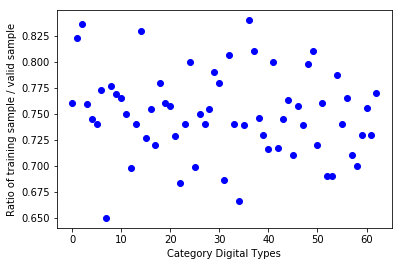

In [164]:
import matplotlib.pyplot as plt
plt.plot(range(63), hg_train/(hg_train+hg_valid), 'bo')
plt.xlabel('Category Digital Types')
plt.ylabel('Ratio of training sample / valid sample')
plt.show()

In [ ]:
# After sanity check from the distribution, our training and validation set look reasonable for the model training.
# Most of the ratio between 0.7 and 0.8

# 2. Feature Engineering

The next step is the feature engineering step. In this step, raw text data will be transformed into feature vectors and new features will be created using the existing dataset. We will implement the following different ideas in order to obtain relevant features from our dataset.

2.1 Count Vectors as features

2.2 TF-IDF Vectors as features

Word level

N-Gram level

Character level

2.3 Word Embeddings as features

2.1 Count Vectors as features

Count Vector is a matrix notation of the dataset in which every row represents a document from the corpus, every column represents a term from the corpus, and every cell represents the frequency count of a particular term in a particular document.

In [138]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(df['Title'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

2.2 TF-IDF Vectors as features

TF-IDF score represents the relative importance of a term in the document and the entire corpus. TF-IDF score is composed by two terms: the first computes the normalized Term Frequency (TF), the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)
IDF(t) = log_e(Total number of documents / Number of documents with term t in it)

TF-IDF Vectors can be generated at different levels of input tokens (words, characters, n-grams)

a. Word Level TF-IDF : Matrix representing tf-idf scores of every term in different documents
b. N-gram Level TF-IDF : N-grams are the combination of N terms together. This Matrix representing tf-idf scores of N-grams
c. Character Level TF-IDF : Matrix representing tf-idf scores of character level n-grams in the corpus

In [139]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=3000)
tfidf_vect.fit(df['Title'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

In [140]:
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(df['Title'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

In [142]:
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(df['Title'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 

2.3 Word Embeddings

A word embedding is a form of representing words and documents using a dense vector representation. The position of a word within the vector space is learned from text and is based on the words that surround the word when it is used. Word embeddings can be trained using the input corpus itself or can be generated using pre-trained word embeddings such as Glove, FastText, and Word2Vec. Any one of them can be downloaded and used as transfer learning. One can read more about word embeddings here.

Following snnipet shows how to use pre-trained word embeddings in the model. There are four essential steps:

Loading the pretrained word embeddings
Creating a tokenizer object
Transforming text documents to sequence of tokens and pad them
Create a mapping of token and their respective embeddings
You can download the pre-trained word embeddings from here https://s3-us-west-1.amazonaws.com/fasttext-vectors/wiki-news-300d-1M.vec.zip

In [143]:
import numpy
from keras.preprocessing import text, sequence
# load the pre-trained word-embedding vectors 
embeddings_index = {}
for i, line in enumerate(open('pre_trained_model/wiki-news-300d-1M.vec')):
    values = line.split()
    embeddings_index[values[0]] = numpy.asarray(values[1:], dtype='float32')

# create a tokenizer 
token = text.Tokenizer()
token.fit_on_texts(df['Title'])
word_index = token.word_index

# convert text to sequence of tokens and pad them to ensure equal length vectors 
train_seq_x = sequence.pad_sequences(token.texts_to_sequences(train_x), maxlen=70)
valid_seq_x = sequence.pad_sequences(token.texts_to_sequences(valid_x), maxlen=70)

# create token-embedding mapping
embedding_matrix = numpy.zeros((len(word_index) + 1, 300))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
# After using the pre_trained model, we got all the word embeddings for our dataset.
# For sentence embeddings, we use the average of each word embeddings.

In [166]:
train_sample_number, dim = train_seq_x.shape
train_embedding_x = numpy.zeros((train_sample_number, 300))

for i in range(train_sample_number):
    count = 0
    for index in train_seq_x[i]:
        if index != 0:
            count+= 1
            train_embedding_x[i]+=embedding_matrix[index]
    train_embedding_x[i]/=count

valid_sample_number, dim = valid_seq_x.shape
valid_embedding_x = numpy.zeros((valid_sample_number, 300))

for i in range(valid_sample_number):
    count = 0
    for index in valid_seq_x[i]:
        if index != 0:
            count+= 1
            valid_embedding_x[i]+=embedding_matrix[index]
    valid_embedding_x[i]/=count

# 3. Model Building

The final step in the text classification framework is to train a classifier using the features created in the previous step. There are many different choices of machine learning models which can be used to train a final model. We will implement following different classifiers for this purpose:

Naive Bayes Classifier
Linear Classifier
Shallow Neural Networks

Lets implement these models and understand their details. The following function is a utility function which can be used to train a model. It accepts the classifier, feature_vector of training data, labels of training data and feature vectors of valid data as inputs. Using these inputs, the model is trained and accuracy score is computed.

In [175]:
def train_model(classifier, feature_vector_train, train_label, feature_vector_valid, valid_label, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, train_label)
    
    # predict the labels on training dataset
    prediction_train = classifier.predict(feature_vector_train)
    # predict the labels on validation dataset
    prediction_valid = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        prediction_train = prediction_train.argmax(axis=-1)
        prediction_valid = prediction_valid.argmax(axis=-1)
   
    return metrics.accuracy_score(prediction_train, train_label), metrics.accuracy_score(prediction_valid, valid_label)

3.1 Naive Bayes

Implementing a naive bayes model using sklearn implementation with different features

Naive Bayes is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. A Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature

In [169]:
# Naive Bayes on Count Vectors
accuracy_train, accuracy_valid = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count, valid_y)
print ("Naive Bayes, Count Vectors, Training accuracy: ", accuracy_train)
print ("Naive Bayes, Count Vectors, Valid accuracy: ", accuracy_valid)

# Naive Bayes on Word Level TF IDF Vectors
accuracy_train, accuracy_valid = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf, valid_y)
print ("Naive Bayes, Word Level TF IDF Vectors, Training accuracy: ", accuracy_train)
print ("Naive Bayes, Word Level TF IDF Vectors, Valid accuracy: ", accuracy_valid)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy_train, accuracy_valid = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, valid_y)
print ("Naive Bayes, Ngram Level TF IDF Vectors, Training accuracy: ", accuracy_train)
print ("Naive Bayes, Ngram Level TF IDF Vectors, Valid accuracy: ", accuracy_valid)

# Naive Bayes on Character Level TF IDF Vectors
accuracy_train, accuracy_valid = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars, valid_y)
print ("Naive Bayes, Character Level TF IDF Vectors, Training accuracy: ", accuracy_train)
print ("Naive Bayes, Character Level TF IDF Vectors, Valid accuracy: ", accuracy_valid)

Naive Bayes, Count Vectors, Training accuracy:  0.944751381215
Naive Bayes, Count Vectors, Valid accuracy:  0.823724320742
Naive Bayes, Word Level TF IDF Vectors, Training accuracy:  0.920883977901
Naive Bayes, Word Level TF IDF Vectors, Valid accuracy:  0.835652750166
Naive Bayes, Ngram Level TF IDF Vectors, Training accuracy:  0.84044198895
Naive Bayes, Ngram Level TF IDF Vectors, Valid accuracy:  0.752153744201
Naive Bayes, Character Level TF IDF Vectors, Training accuracy:  0.892596685083
Naive Bayes, Character Level TF IDF Vectors, Valid accuracy:  0.806494367131
Naive Bayes, Pre_trained Embedding Vectors, Training accuracy:  0.821657458564
Naive Bayes, Pre_trained Embedding Vectors, Valid accuracy:  0.772697150431


3.2 Linear Classifier (Logistic Regression)

Implementing a Linear Classifier (Logistic Regression)

In [ ]:
# Logistic Regression on Count Vectors
accuracy_train, accuracy_valid = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count, valid_y)
print ("Logistic Regression, Count Vectors, Training accuracy: ", accuracy_train)
print ("Logistic Regression, Count Vectors, Valid accuracy: ", accuracy_valid)

# Logistic Regression on Word Level TF IDF Vectors
accuracy_train, accuracy_valid = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf, valid_y)
print ("Logistic Regression, Word Level TF IDF Vectors, Training accuracy: ", accuracy_train)
print ("Logistic Regression, Word Level TF IDF Vectors, Valid accuracy: ", accuracy_valid)

# Logistic Regression on Ngram Level TF IDF Vectors
accuracy_train, accuracy_valid = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, valid_y)
print ("Logistic Regression, Ngram Level TF IDF Vectors, Training accuracy: ", accuracy_train)
print ("Logistic Regression, Ngram Level TF IDF Vectors, Valid accuracy: ", accuracy_valid)

# Logistic Regression on Character Level TF IDF Vectors
accuracy_train, accuracy_valid = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars, valid_y)
print ("Logistic Regression, Character Level TF IDF Vectors, Training accuracy: ", accuracy_train)
print ("Logistic Regression, Character Level TF IDF Vectors, Valid accuracy: ", accuracy_valid)

# Logistic Regression on Pre_trained Embedding Vectors
accuracy_train, accuracy_valid = train_model(linear_model.LogisticRegression(), train_embedding_x, train_y, valid_embedding_x, valid_y)
print ("Logistic Regression, Pre_trained Embedding Vectors, Training accuracy: ", accuracy_train)
print ("Logistic Regression, Pre_trained Embedding Vectors, Valid accuracy: ", accuracy_valid)

In [ ]:
3.3 Deep Neural Network via Keras

In [ ]:
# Adjust the label from integer to one hot vector

In [193]:
train_y_nn = np.array(train_y)
train_example, = train_y_nn.shape
train_onehot = np.zeros((train_example, 63))
train_onehot[np.arange(train_example), train_y_nn] = 1

In [195]:
valid_y_nn = np.array(valid_y)
valid_example, = valid_y_nn.shape
valid_onehot = np.zeros((valid_example, 63))
valid_onehot[np.arange(valid_example), valid_y_nn] = 1

In [240]:
def train_NN_model(train_x, train_y, valid_x, valid_y):
    from keras import layers, models, optimizers
    from keras.models import Sequential
    from keras.layers import Dense, Dropout, Activation
    
    model = Sequential()
    # Dense(128) is a fully-connected layer with 64 hidden units.
    # in the first layer, you must specify the expected input data shape:
    model.add(Dense(128, activation='relu', input_dim=train_x.shape[1]))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(63, activation='softmax'))
    model.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(train_x, train_y, epochs=50, verbose=2)
    score, accuracy = model.evaluate(valid_x, valid_y)
    return accuracy

In [239]:
# DNN on Count Vectors
accuracy_valid = train_NN_model(xtrain_count, train_onehot, xvalid_count, valid_onehot)
print ("DNN, Count Vectors, Valid accuracy: ", accuracy_valid)

# DNN on Word Level TF IDF Vectors
accuracy_valid = train_NN_model(xtrain_tfidf, train_onehot, xvalid_tfidf, valid_onehot)
print ("DNN, Word Level TF IDF Vectors, Valid accuracy: ", accuracy_valid)

# DNN on Ngram Level TF IDF Vectors
accuracy_valid = train_NN_model(xtrain_tfidf_ngram, train_onehot, xvalid_tfidf_ngram, valid_onehot)
print ("DNN, Ngram Level TF IDF Vectors, Valid accuracy: ", accuracy_valid)

# DNN on Character Level TF IDF Vectors
accuracy_valid = train_NN_model(xtrain_tfidf_ngram_chars, train_onehot, xvalid_tfidf_ngram_chars, valid_onehot)
print ("DNN, Character Level TF IDF Vectors, Valid accuracy: ", accuracy_valid)

# DNN on Pre_trained Embedding Vectors
accuracy_valid = train_NN_model(train_embedding_x, train_onehot, valid_embedding_x, valid_onehot)
print ("DNN, Pre_trained Embedding Vectors, Valid accuracy: ", accuracy_valid)

Epoch 1/50
 - 4s - loss: 3.9183 - acc: 0.1162
Epoch 2/50
 - 3s - loss: 2.7504 - acc: 0.3967
Epoch 3/50
 - 3s - loss: 1.8393 - acc: 0.5719
Epoch 4/50
 - 3s - loss: 1.3399 - acc: 0.6789
Epoch 5/50
 - 3s - loss: 1.0482 - acc: 0.7414
Epoch 6/50
 - 3s - loss: 0.8715 - acc: 0.7759
Epoch 7/50
 - 4s - loss: 0.6979 - acc: 0.8241
Epoch 8/50
 - 3s - loss: 0.6278 - acc: 0.8331
Epoch 9/50
 - 3s - loss: 0.5528 - acc: 0.8530
Epoch 10/50
 - 4s - loss: 0.4992 - acc: 0.8670
Epoch 11/50
 - 4s - loss: 0.4295 - acc: 0.8860
Epoch 12/50
 - 3s - loss: 0.4126 - acc: 0.8873
Epoch 13/50
 - 3s - loss: 0.3708 - acc: 0.8952
Epoch 14/50
 - 3s - loss: 0.3324 - acc: 0.9054
Epoch 15/50
 - 3s - loss: 0.3264 - acc: 0.9087
Epoch 16/50
 - 3s - loss: 0.3031 - acc: 0.9120
Epoch 17/50
 - 3s - loss: 0.2989 - acc: 0.9101
Epoch 18/50
 - 3s - loss: 0.2692 - acc: 0.9277
Epoch 19/50
 - 3s - loss: 0.2506 - acc: 0.9295
Epoch 20/50
 - 3s - loss: 0.2485 - acc: 0.9337
Epoch 21/50
 - 3s - loss: 0.2368 - acc: 0.9308
Epoch 22/50
 - 3s - lo

Epoch 19/50
 - 1s - loss: 0.3889 - acc: 0.8869
Epoch 20/50
 - 1s - loss: 0.3851 - acc: 0.8926
Epoch 21/50
 - 1s - loss: 0.3638 - acc: 0.8961
Epoch 22/50
 - 1s - loss: 0.3183 - acc: 0.9085
Epoch 23/50
 - 1s - loss: 0.3192 - acc: 0.9081
Epoch 24/50
 - 1s - loss: 0.3195 - acc: 0.9092
Epoch 25/50
 - 1s - loss: 0.2852 - acc: 0.9180
Epoch 26/50
 - 1s - loss: 0.3009 - acc: 0.9129
Epoch 27/50
 - 1s - loss: 0.2704 - acc: 0.9218
Epoch 28/50
 - 1s - loss: 0.2790 - acc: 0.9165
Epoch 29/50
 - 2s - loss: 0.2539 - acc: 0.9295
Epoch 30/50
 - 2s - loss: 0.2653 - acc: 0.9229
Epoch 31/50
 - 1s - loss: 0.2326 - acc: 0.9315
Epoch 32/50
 - 1s - loss: 0.2326 - acc: 0.9295
Epoch 33/50
 - 1s - loss: 0.2193 - acc: 0.9377
Epoch 34/50
 - 1s - loss: 0.2015 - acc: 0.9372
Epoch 35/50
 - 1s - loss: 0.2039 - acc: 0.9394
Epoch 36/50
 - 1s - loss: 0.1964 - acc: 0.9412
Epoch 37/50
 - 1s - loss: 0.1923 - acc: 0.9403
Epoch 38/50
 - 1s - loss: 0.1865 - acc: 0.9388
Epoch 39/50
 - 1s - loss: 0.1696 - acc: 0.9512
Epoch 40/50
 

In [ ]:
DNN, Count Vectors, Training accuracy:  0.9580
DNN, Count Vectors, Valid accuracy:  0.872763419483
DNN, Word Level TF IDF Vectors, Training accuracy:  0.9483
DNN, Word Level TF IDF Vectors, Valid accuracy:  0.877402253148
DNN, Ngram Level TF IDF Vectors, Training accuracy:  0.8685
DNN, Ngram Level TF IDF Vectors, Valid accuracy:  0.779324055666
DNN, Character Level TF IDF Vectors, Training accuracy:  0.9602
DNN, Character Level TF IDF Vectors, Valid accuracy:  0.86083499006
DNN, Pre_trained Embedding Vectors, Training accuracy:  0.7403
DNN, Pre_trained Embedding Vectors, Valid accuracy:  0.792577866137

In [246]:
def get_train_model(classifier, feature_vector_train, train_label, feature_vector_valid, valid_label, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, train_label)
    
    # predict the labels on training dataset
    prediction_train = classifier.predict(feature_vector_train)
    # predict the labels on validation dataset
    prediction_valid = classifier.predict(feature_vector_valid)
    
    print("Training accuracy: ", metrics.accuracy_score(prediction_train, train_label))
    print("Vlidation accuracy: ", metrics.accuracy_score(prediction_valid, valid_label))
    return classifier

In [247]:
fist_round_model = get_train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count, valid_y)

Training accuracy:  0.995138121547
Vlidation accuracy:  0.876076872101


# Conclustions
Currently, we are using Naive Beayes, Logistic Regression, Deep Neaural Network. Looks like the best vectorization way is Count Vectors. 
The best and efficient model is Logistic Regression model.

# 4. Dive deep into false positive

In [303]:
prediction_valid=fist_round_model.predict(xvalid_count)
error_array = prediction_valid - valid_y
error_index = numpy.nonzero(error_array)

In [293]:
# switch the key value in the dic
dic_id_category = {}
for key, value in dic.items():
    dic_id_category[value] = key

In [304]:
valid_x[1132]

'Canon EOS Rebel T6i Digital SLR (Body Only) - Wi-Fi Enabled'

In [308]:
prediction_valid[0]
dic_id_category[prediction_valid[0]]

'Two Way Radios'

In [307]:
dic_id_category[valid_y[0]]

'Cameras'

# 5. Predictions

In [250]:
# load the dataset
import pandas as pd
df_test = pd.read_excel(io='data/Data To Classify_Assessment.xlsx', sheet_name='sample_data')

In [251]:
df_test[:3]

,ASIN,BrandName,Title
0,B005DIRI6I,Portta,Portta Digital Coaxial Toslink to Analog (L/R)...
1,B000OYR9S8,Savage,Savage SV-107X12-56 Seamless Background Paper ...
2,B00WT9UV3Q,Avtech,AVTech AVS228 8CH HD-SDI DVR


In [253]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(df['Title'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(df_test['Title'])

In [254]:
xtrain_count.shape

(57030, 12080)

In [255]:
prediction_test=fist_round_model.predict(xtrain_count)

In [256]:
prediction_test[:5]

array([ 4, 17, 17, 44, 59])

In [262]:
f = open('result.csv', 'w')
for id in prediction_test:
    f.write(dic_id_category[id] + "\n")
f.close()

# 6. Follow-up: Improving models performance

In [ ]:
1. Data cleaning
    1.1 change all the words into lower case in order to decrease the vocabulary size
        We tried this one already. Looks like there is slightly improvment on the logistic regeression model (Done)
    1.2 stemming: make the vocabulary size even smaller (TODO)
    1.3 Add some NLP features or language features (TODO)

In [ ]:
# Change the text into lower case

In [263]:
label_col = []
text_preprocessed = []
for index, row in df.iterrows():
    categary_name=row['CategoryName']
    text=row['Title']
    label_col.append(dic[categary_name])
    text_preprocessed.append(text.lower())
df['label']=label_col
df['text'] = text_preprocessed

In [264]:
# split the dataset into training and validation datasets
from sklearn import model_selection, preprocessing
train_x_lower, valid_x_lower, train_y_lower, valid_y_lower = model_selection.train_test_split(df['text'], df['label'])
# label encode the target variable 

train_y_lower = encoder.fit_transform(train_y_lower)
valid_y_lower = encoder.fit_transform(valid_y_lower)

In [ ]:
# Only using count vector for vectorization due to the time issue

In [265]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(df['text'])

# transform the training and validation data using count vectorizer object
xtrain_count_lower =  count_vect.transform(train_x_lower)
xvalid_count_lower =  count_vect.transform(valid_x_lower)

In [266]:
accuracy_train, accuracy_valid = train_model(linear_model.LogisticRegression(), xtrain_count_lower, train_y_lower, xvalid_count_lower, valid_y_lower)
print ("Logistic Regression, Count Vectors, Training accuracy: ", accuracy_train)
print ("Logistic Regression, Count Vectors, Valid accuracy: ", accuracy_valid)

Logistic Regression, Count Vectors, Training accuracy:  0.995580110497
Logistic Regression, Count Vectors, Valid accuracy:  0.882703777336


In [ ]:
# Slightly improvement with this change

2 Feature engineering

So far, we did not touch about brand name. Treated the BrandName as a category feature. 
After converting the BrandName into one hot vector, we re-do the whole process with BrandName feature.
The performance become even worse. (Done)

# Question: How to leverage the BrandName feature?
After checking the training dataset, I found some of BrandName only matches one Category,
which means if we know the BrandName, we also can get the category name.

In [ ]:
# Put the BrandName as a key, and put all the Category Name in the list as a value

In [267]:
dic={}
dic_brand_name={}
count=0
brand_count=0
dic_brand_category={}
for index, row in df.iterrows():
    categary_name=row['CategoryName']
    brand_name=row['BrandName']
    if categary_name not in dic:
        dic[categary_name]=count
        count+=1
    if brand_name not in dic_brand_name:
        dic_brand_name[brand_name]=brand_count
        brand_count+=1
        categary_list =[]
        categary_list.append(categary_name)
        dic_brand_category[brand_name]=categary_list
    else:
        dic_brand_category[brand_name].append(categary_name)

In [ ]:
# Find all the brand name only has one category name

In [268]:
brandName_with_one_category = set()
for key,value in dic_brand_category.items():
    temp_set = set()
    for category in value:
        temp_set.add(category)
    if len(temp_set) == 1:
        brandName_with_one_category.add(key)

In [270]:
len(brandName_with_one_category)

1202

In [273]:
label_col = []
text_preprocessed = []
brand_list=[]
for index, row in df.iterrows():
    categary_name=row['CategoryName']
    text=row['Title']
    brand_name=row['BrandName']
    if brand_name in brandName_with_one_category:
        df.drop(df.index[index])
        print(row)
        continue
    label_col.append(dic[categary_name])
    text_preprocessed.append(text.lower())

ASIN                                                   B014FCC4NO
CategoryName                                           Headphones
BrandName                                                01 Audio
Title           Bluetooth Headphones, Wireless Earbuds Earphon...
label                                                           0
text            bluetooth headphones, wireless earbuds earphon...
Name: 0, dtype: object
ASIN                                                   B016UZDYP6
CategoryName                                       Monitor Risers
BrandName                                             2 Lb. Depot
Title           2LB Depot Monitor Stand, Printer Stand with Ad...
label                                                           5
text            2lb depot monitor stand, printer stand with ad...
Name: 9, dtype: object
ASIN                             B01G95INDK
CategoryName                  Video Cameras
BrandName                            360fly
Title           360fly 360° 4K

ASIN                                                   B00YZF7EWS
CategoryName                              Security & Surveillance
BrandName                                                 Amcrest
Title           Amcrest 960H 16CH 1TB Security Camera DVR (Cam...
label                                                           2
text            amcrest 960h 16ch 1tb security camera dvr (cam...
Name: 262, dtype: object
ASIN                                                   B00YZF8UWG
CategoryName                              Security & Surveillance
BrandName                                                 Amcrest
Title           Amcrest 960H 8CH 1TB Security Camera DVR (Came...
label                                                           2
text            amcrest 960h 8ch 1tb security camera dvr (came...
Name: 263, dtype: object
ASIN                                                   B00YZF7PEU
CategoryName                              Security & Surveillance
BrandName                 

ASIN                                                   B002VQVZCS
CategoryName                            Car & Vehicle Electronics
BrandName                                               Auto Page
Title           AutoPage 2-Way, 3-Channel Vehicle Security Sys...
label                                                          20
text            autopage 2-way, 3-channel vehicle security sys...
Name: 639, dtype: object
ASIN                                                   B01DXCPU7Y
CategoryName                                        Car Dash Cams
BrandName                                                Auto-Vox
Title           AUTO-VOX Mini Adapter Dash Cam In-Car Charger ...
label                                                          53
text            auto-vox mini adapter dash cam in-car charger ...
Name: 640, dtype: object
ASIN                                                   B00UUQD9L6
CategoryName                                        Car Dash Cams
BrandName                 

Name: 859, dtype: object
ASIN                                                   B00T2WIQSA
CategoryName                                         Motherboards
BrandName                                                BitFenix
Title           BitFenix Micro ATX, Mini-ITX Motherboard Cases...
label                                                          50
text            bitfenix micro atx, mini-itx motherboard cases...
Name: 860, dtype: object
ASIN                               B000LF4Z8M
CategoryName              Binoculars & Scopes
BrandName                           Blackhawk
Title           Padded Scope & Crown Cover Od
label                                      36
text            padded scope & crown cover od
Name: 865, dtype: object
ASIN                                             B005HWC6PI
CategoryName                             Camera Accessories
BrandName                                        BlackRapid
Title           BlackRapid RRS-1BB Sport (RS-Sport) (Black)
label        

ASIN                                                   B00FCB77JO
CategoryName                                          Ink & Toner
BrandName                                                     C&E
Title           C&E CNE12527 OEM Equivalent Konica Minolta A11...
label                                                          19
text            c&e cne12527 oem equivalent konica minolta a11...
Name: 1054, dtype: object
ASIN                                                   B00A7DFYL0
CategoryName                                   Tablet Accessories
BrandName                                                     C&S
Title           4400mAh DR-A013 Battery AMAZON Kindle Fire, D0...
label                                                          22
text            4400mah dr-a013 battery amazon kindle fire, d0...
Name: 1055, dtype: object
ASIN                                                   B000067RTS
CategoryName                                     Power Management
BrandName               

ASIN                                                   B00SVX3YO2
CategoryName                              Security & Surveillance
BrandName                                                   Dahua
Title           IPC-HFW2300R-Z 3 Megapixel Motorized zoom 2.8-...
label                                                           2
text            ipc-hfw2300r-z 3 megapixel motorized zoom 2.8-...
Name: 1411, dtype: object
ASIN                                                   B00WAKECEI
CategoryName                              Security & Surveillance
BrandName                                                   Dahua
Title           Dahua IPC-HDB4300F-PT Pan tilt dome network IP...
label                                                           2
text            dahua ipc-hdb4300f-pt pan tilt dome network ip...
Name: 1412, dtype: object
ASIN                                                   B00G3K1XC0
CategoryName                              Security & Surveillance
BrandName               

ASIN                                                   B00VOEP7Y0
CategoryName                                            Batteries
BrandName                                                Duracell
Title           DURACELL New Mega Size Package D12 PROCELL Pro...
label                                                          28
text            duracell new mega size package d12 procell pro...
Name: 1681, dtype: object
ASIN                                                   B008ORUYU2
CategoryName                                            Batteries
BrandName                                                Duracell
Title           Duracell Alkaline Duralock Batteries AA 20 Pac...
label                                                          28
text            duracell alkaline duralock batteries aa 20 pac...
Name: 1682, dtype: object
ASIN                         B000GAWYEE
CategoryName                  Batteries
BrandName                      Duracell
Title           DURA 2PK 12V/21 Batt

ASIN                                                   B003S3RFIQ
CategoryName                                           Headphones
BrandName                                       Etymotic Research
Title           Etymotic Research MC5 Noise Isolating In-Ear E...
label                                                           0
text            etymotic research mc5 noise isolating in-ear e...
Name: 1919, dtype: object
ASIN                                                   B00YZEJB1G
CategoryName                                       Monitor Risers
BrandName                                                 Eutuxia
Title           Eutuxia [Type M] Monitor Stand - [Wide Dimensi...
label                                                           5
text            eutuxia [type m] monitor stand - [wide dimensi...
Name: 1920, dtype: object
ASIN                                                   B00R6NJD2K
CategoryName                                       Monitor Risers
BrandName               

ASIN                                                   B001796UVG
CategoryName                                            Keyboards
BrandName                                                   Gator
Title           Gator 88 Note Keyboard Gig Bag; Slim Design (G...
label                                                          13
text            gator 88 note keyboard gig bag; slim design (g...
Name: 2091, dtype: object
ASIN                                                   B001AEP4YW
CategoryName                                   Office Electronics
BrandName                                                     GBC
Title           GBC HeatSeal  Laminating Film Roll, 3-mm,25-In...
label                                                          16
text            gbc heatseal  laminating film roll, 3-mm,25-in...
Name: 2092, dtype: object
ASIN                                                   B0017TIATG
CategoryName                                   Office Electronics
BrandName               

ASIN                                                   B00T3VMTVA
CategoryName                          Car Subwoofers & Amplifiers
BrandName                                                Hifonics
Title           Hifonics BRX2416.1D Brutus Mono Super D-Class ...
label                                                          23
text            hifonics brx2416.1d brutus mono super d-class ...
Name: 2262, dtype: object
ASIN                                                   B00BHSTTLU
CategoryName                          Car Subwoofers & Amplifiers
BrandName                                                Hifonics
Title           Hifonics BRX1100.1D Brutus Vehicle Mono Subwoo...
label                                                          23
text            hifonics brx1100.1d brutus vehicle mono subwoo...
Name: 2263, dtype: object
ASIN                                                   B00T3VMT42
CategoryName                          Car Subwoofers & Amplifiers
BrandName               

ASIN                                                   B01EFSSOE6
CategoryName                                        Camera Lenses
BrandName                                       Indie Camera Gear
Title           Canon Camera Lens Coffee Mug & 16gb USB Flash ...
label                                                          61
text            canon camera lens coffee mug & 16gb usb flash ...
Name: 2532, dtype: object
ASIN                                                   B00IZHBVUI
CategoryName                                     Video Projectors
BrandName                                                 InFocus
Title           InFocus IN116X DLP Projector, High Definition ...
label                                                          21
text            infocus in116x dlp projector, high definition ...
Name: 2538, dtype: object
ASIN                              B00XIPJ0MS
CategoryName                Video Projectors
BrandName                            InFocus
Title           InFoc

Name: 2753, dtype: object
ASIN                                    B00HRLTIN0
CategoryName                    Tablet Accessories
BrandName                                   Kindle
Title           Kindle Fire Replacement AC Adapter
label                                           22
text            kindle fire replacement ac adapter
Name: 2754, dtype: object
ASIN                                                   B004005WWW
CategoryName                                       Monitor Risers
BrandName                                             Kings Brand
Title           Kings Brand Multifunctional Laptop Table Stand...
label                                                           5
text            kings brand multifunctional laptop table stand...
Name: 2755, dtype: object
ASIN                                                   B00AWHUGMS
CategoryName                            Portable Audio & Speakers
BrandName                                                  Kinivo
Title           Kinivo

ASIN                                                   B00QRCK7Q2
CategoryName                                               Cables
BrandName                                                   Luxtr
Title           Lightning To USB Cable, Luxtr Apple Certified ...
label                                                           1
text            lightning to usb cable, luxtr apple certified ...
Name: 3057, dtype: object
ASIN                                                   B00WRHTOFG
CategoryName                          Microphones and Accessories
BrandName                                                  LyxPro
Title           LyxPro LDC-10 Cardioid Condenser Studio Microp...
label                                                          54
text            lyxpro ldc-10 cardioid condenser studio microp...
Name: 3058, dtype: object
ASIN                                     B0086KP1NC
CategoryName                    Wearable Technology
BrandName                                  Magellan


Name: 3284, dtype: object
ASIN                                                   B00938K6FO
CategoryName                                   Tripods & Monopods
BrandName                                               Mnafrotto
Title           Manfrotto Professional Aluminum Video Monopod ...
label                                                          26
text            manfrotto professional aluminum video monopod ...
Name: 3285, dtype: object
ASIN                                                   B00HSMK580
CategoryName                               Television Accessories
BrandName                                                    Mohu
Title           Mohu Leaf 30 TV Antenna, Indoor, 30 Mile Range...
label                                                           4
text            mohu leaf 30 tv antenna, indoor, 30 mile range...
Name: 3286, dtype: object
ASIN                                                   B004QK7HI8
CategoryName                               Television Accessorie

ASIN                                                   B000GU78Z4
CategoryName                                           Home Audio
BrandName                                                   Onkyo
Title           Onkyo SKS-HT540 7.1 Channel Home Theater Speak...
label                                                          31
text            onkyo sks-ht540 7.1 channel home theater speak...
Name: 3838, dtype: object
ASIN                                                   B00YMN69XS
CategoryName                                           Home Audio
BrandName                                                   Onkyo
Title           Onkyo HT-S5800 5.1.2-Channel Dolby Atmos Home ...
label                                                          31
text            onkyo ht-s5800 5.1.2-channel dolby atmos home ...
Name: 3839, dtype: object
ASIN                                                   B004W2NE5K
CategoryName                                           Home Audio
BrandName               

ASIN                                                   B00K5YTT5S
CategoryName                            Portable Audio & Speakers
BrandName                                    Performance Teknique
Title           Performance Teknique ICBM-TOWER Dual 10-Inch P...
label                                                          42
text            performance teknique icbm-tower dual 10-inch p...
Name: 4033, dtype: object
ASIN                                                   B00LIATA98
CategoryName                            Portable Audio & Speakers
BrandName                                    Performance Teknique
Title           Performance Teknique ICBM-SNAKE 8 Portable spe...
label                                                          42
text            performance teknique icbm-snake 8 portable spe...
Name: 4034, dtype: object
ASIN                                                   B0063N82OO
CategoryName                                      Radar Detectors
BrandName               

ASIN                                                   B00RA38YIK
CategoryName                                      Radar Detectors
BrandName                                             Radar Mount
Title           Radar Mount Mirror Wire Power Cord for Beltron...
label                                                          33
text            radar mount mirror wire power cord for beltron...
Name: 4240, dtype: object
ASIN                                                   B00TKUS9Q8
CategoryName                                      Radar Detectors
BrandName                                             Radar Mount
Title           Radar Mount Valentine V1 Radar Detector Plasti...
label                                                          33
text            radar mount valentine v1 radar detector plasti...
Name: 4241, dtype: object
ASIN                                                   B00UB9WMZQ
CategoryName                                      Radar Detectors
BrandName               

ASIN                                                   B006MI1T4A
CategoryName                                        Camera Lenses
BrandName                                                 Samyang
Title           Samyang SY14M-C 14mm F2.8 Ultra Wide Fixed Ang...
label                                                          61
text            samyang sy14m-c 14mm f2.8 ultra wide fixed ang...
Name: 4594, dtype: object
ASIN                                           B002O4I1PG
CategoryName                    Portable Audio & Speakers
BrandName                                         Sangean
Title           Sangean Pillow 3.5mm Aux Portable Speaker
label                                                  42
text            sangean pillow 3.5mm aux portable speaker
Name: 4641, dtype: object
ASIN                                                   B00B3WTWXU
CategoryName                                          Video Cards
BrandName                                     Sapphire Technology
Title 

Name: 4848, dtype: object
ASIN                                                   B01FR15TRK
CategoryName                                   Tablet Accessories
BrandName                                                  SMONET
Title           Smonet Destop Anti-Theft Pos Ipad Stand Holder...
label                                                          22
text            smonet destop anti-theft pos ipad stand holder...
Name: 4849, dtype: object
ASIN                                                   B01B2EC4FG
CategoryName                                         Motherboards
BrandName                                                 SNANSHI
Title           USB Motherboard Connector,SNANSHI 20Pin USB3.0...
label                                                          50
text            usb motherboard connector,snanshi 20pin usb3.0...
Name: 4850, dtype: object
ASIN                                                   B00SEC3AS0
CategoryName                                  Wearable Technolog

ASIN                                                   B01FYD9UO4
CategoryName                                         Motherboards
BrandName                                              Supermicro
Title           Supermicro DDR3 Socket F Motherboard X10SDV-6C...
label                                                          50
text            supermicro ddr3 socket f motherboard x10sdv-6c...
Name: 5138, dtype: object
ASIN                                                   B00ASHGJ50
CategoryName                                         Motherboards
BrandName                                              Supermicro
Title           Supermicro Motherboard MBD-X9SAE-V-O LGA1155 I...
label                                                          50
text            supermicro motherboard mbd-x9sae-v-o lga1155 i...
Name: 5139, dtype: object
ASIN                                                   B01A5EVTA0
CategoryName                                  Wearable Technology
BrandName               

ASIN                                                   B00DXO0W6W
CategoryName                                          Calculators
BrandName                                       Texas Instruments
Title           Texas Instruments TI-84 Plus C Silver Edition ...
label                                                          60
text            texas instruments ti-84 plus c silver edition ...
Name: 5276, dtype: object
ASIN                                                   B00000JF55
CategoryName                                          Calculators
BrandName                                       Texas Instruments
Title           Texas Instruments TI-89 Advanced Graphing Calc...
label                                                          60
text            texas instruments ti-89 advanced graphing calc...
Name: 5277, dtype: object
ASIN                                                   B00KJ2624C
CategoryName                                   TV Mounts & Stands
BrandName               

ASIN                                                  B0031743ZC
CategoryName                                    GPS & Navigation
BrandName                                             Trail Tech
Title           Trail Tech 752-4011 Black Vapor Stealth Computer
label                                                         32
text            trail tech 752-4011 black vapor stealth computer
Name: 5478, dtype: object
ASIN                                                  B0041C986A
CategoryName                                    GPS & Navigation
BrandName                                             Trail Tech
Title           Trail Tech 752-4017 Black Vapor Stealth Computer
label                                                         32
text            trail tech 752-4017 black vapor stealth computer
Name: 5479, dtype: object
ASIN                                                  B0031703OM
CategoryName                                    GPS & Navigation
BrandName                             

Name: 5704, dtype: object
ASIN                                                   B012BLDTHQ
CategoryName                                       Standing Desks
BrandName                                                Varidesk
Title           VARIDESK - Height-Adjustable Standing Desk for...
label                                                          57
text            varidesk - height-adjustable standing desk for...
Name: 5705, dtype: object
ASIN                                                   B00JI6NCCK
CategoryName                                       Standing Desks
BrandName                                                Varidesk
Title           VARIDESK - Height-Adjustable Standing Desk - P...
label                                                          57
text            varidesk - height-adjustable standing desk - p...
Name: 5706, dtype: object
ASIN                                                   B016C0JMYQ
CategoryName                                       Standing Desk

Name: 5964, dtype: object
ASIN                                                   B001JI2KHS
CategoryName                          Microphones and Accessories
BrandName                                        Your Cable Store
Title           Your Cable Store XLR 3 Pin Microphone Cable (6...
label                                                          54
text            your cable store xlr 3 pin microphone cable (6...
Name: 5965, dtype: object
ASIN                                                   B00O4CT006
CategoryName                                     Power Management
BrandName                                              Yubi Power
Title           Yubi Power Compact Power Strip Surge Protector...
label                                                          43
text            yubi power compact power strip surge protector...
Name: 5966, dtype: object
ASIN                                                   B010170498
CategoryName                                               Drone

ValueError: Length of values does not match length of index

In [275]:
len(label_col)

3629

In [277]:
len(text_preprocessed)

3629

In [279]:
filtered_df = pd.DataFrame({'text':text_preprocessed})
filtered_df['label'] = label_col

In [280]:
filtered_df.loc[:5]

,text,label
0,1byone lightning to usb cable 3.28ft (1m) for...,1
1,1byone? 7 inch colorful lcd screen video doorb...,2
2,1byone 5ghz wireless hdmi streaming media play...,3
3,1byone shiny antenna super thin amplified hdtv...,4
4,1byone ous00-0185 super thin indoor hdtv anten...,4
5,1byone ous00-0187 super thin hdtv antenna with...,4


In [281]:
# split the dataset into training and validation datasets
from sklearn import model_selection, preprocessing
train_x_filtered, valid_x_filtered, train_y_filtered, valid_y_filtered = model_selection.train_test_split(filtered_df['text'], filtered_df['label'])
# label encode the target variable 

train_y_filtered = encoder.fit_transform(train_y_filtered)
valid_y_filtered = encoder.fit_transform(valid_y_filtered)

In [ ]:
# Vectorization

In [282]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(filtered_df['text'])

# transform the training and validation data using count vectorizer object
xtrain_count_filtered =  count_vect.transform(train_x_filtered)
xvalid_count_filtered =  count_vect.transform(valid_x_filtered)

In [ ]:
# model training

In [283]:
accuracy_train, accuracy_valid = train_model(linear_model.LogisticRegression(), xtrain_count_filtered, train_y_filtered, xvalid_count_filtered, valid_y_filtered)
print ("Logistic Regression, Count Vectors, Training accuracy: ", accuracy_train)
print ("Logistic Regression, Count Vectors, Valid accuracy: ", accuracy_valid)

Logistic Regression, Count Vectors, Training accuracy:  0.994487320838
Logistic Regression, Count Vectors, Valid accuracy:  0.870044052863


# Big improvement with new features

In [311]:
# Although comparing with the orginal best valid accuracy is around 1 percent lower, overall accuracy is boosted.
# Orignal we have total 6034 cases. Training is 4525 Validation is 1509.
# Now the total is reduced to 3629. Training is 2721 Validation is 907. The ratio still 3:1
# With brand name we can have a 2405 cases always right.
# The total true positive cases for second validation is 907 * 0.87 = 789. 
# The precision is 789+602(based on the ratio of training set to validation set)/ 1509 (the original total validation set)
# The precision is 92.18%

3 Hyperparameter fine tuning

4 Other open source tool kit for text classification.

#FastText is a facebook open source project for text embedding and classification. Convereted the original test file format. Ran the classification training with FastText. Could not beat the current precision.